In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io


Bad key "text.kerning_factor" on line 4 in
F:\anaconda3\envs\Machine Learning\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [8]:
url='https://bit.ly/3i4rbWl'
data=pd.read_csv('SampleSuperstore.csv')

In [9]:
data.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


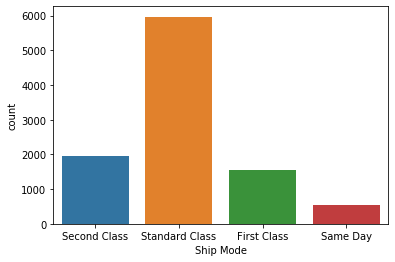

In [12]:
sns.countplot(data['Ship Mode'])

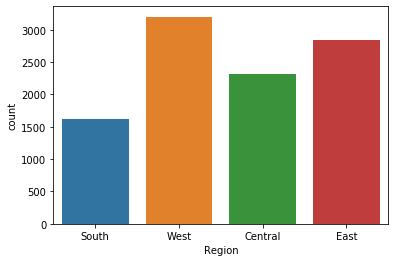

In [13]:
sns.countplot(data['Region'])

In [14]:
data['Category'].count()

9994

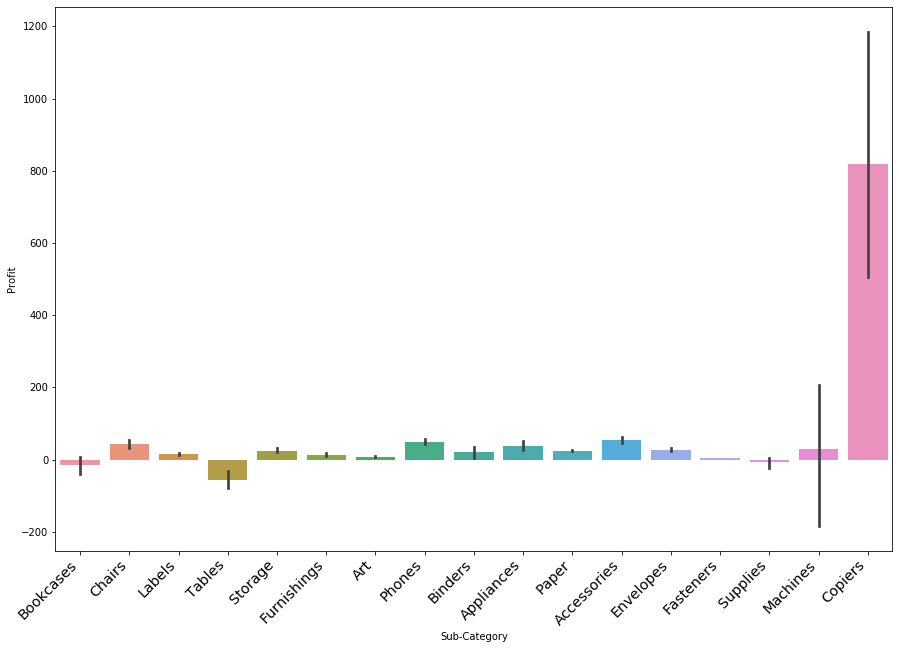

In [15]:
plt.figure(figsize=(15,10))
ax=sns.barplot(data['Sub-Category'],data['Profit'],data=data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

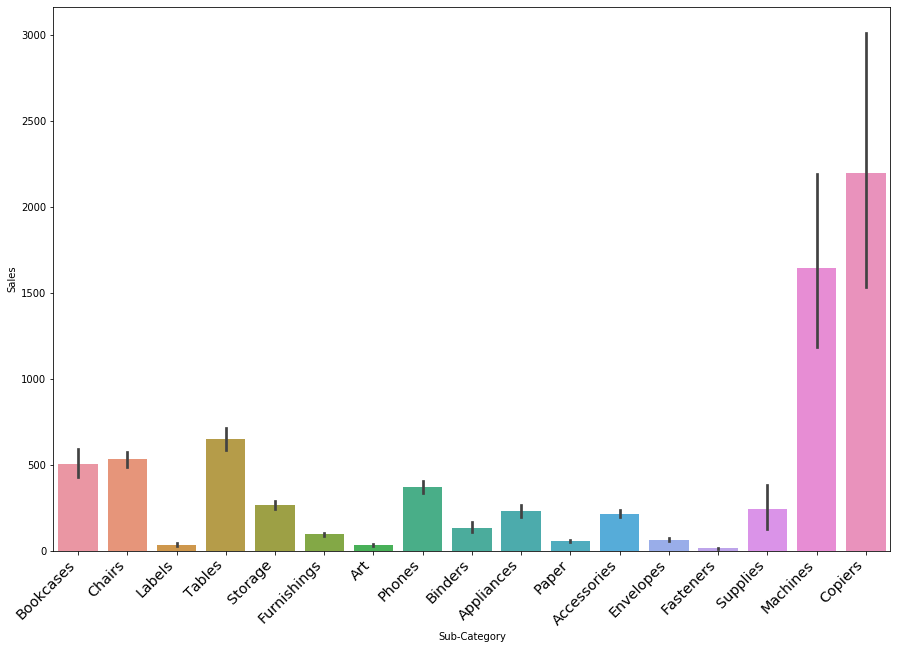

In [16]:
plt.figure(figsize=(15,10))
ax=sns.barplot(data['Sub-Category'],data['Sales'],data=data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

In [17]:
cities=np.array(data['City'])

In [18]:
# sns.pairplot(data=data,hue='Profit')

In [19]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [20]:
Data=pd.DataFrame()
Data=data.iloc[:,-5:]

In [21]:
Data

,Sub-Category,Sales,Quantity,Discount,Profit
0,Bookcases,261.9600,2,0.00,41.9136
1,Chairs,731.9400,3,0.00,219.5820
2,Labels,14.6200,2,0.00,6.8714
3,Tables,957.5775,5,0.45,-383.0310
4,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...
9989,Furnishings,25.2480,3,0.20,4.1028
9990,Furnishings,91.9600,2,0.00,15.6332
9991,Phones,258.5760,2,0.20,19.3932
9992,Paper,29.6000,4,0.00,13.3200


In [22]:
Data.drop('Sales',axis=1)

,Sub-Category,Quantity,Discount,Profit
0,Bookcases,2,0.00,41.9136
1,Chairs,3,0.00,219.5820
2,Labels,2,0.00,6.8714
3,Tables,5,0.45,-383.0310
4,Storage,2,0.20,2.5164
...,...,...,...,...
9989,Furnishings,3,0.20,4.1028
9990,Furnishings,2,0.00,15.6332
9991,Phones,2,0.20,19.3932
9992,Paper,4,0.00,13.3200


In [23]:
Data['state']=data['State']

In [24]:
Data.drop('Discount',axis=1)

,Sub-Category,Sales,Quantity,Profit,state
0,Bookcases,261.9600,2,41.9136,Kentucky
1,Chairs,731.9400,3,219.5820,Kentucky
2,Labels,14.6200,2,6.8714,California
3,Tables,957.5775,5,-383.0310,Florida
4,Storage,22.3680,2,2.5164,Florida
...,...,...,...,...,...
9989,Furnishings,25.2480,3,4.1028,Florida
9990,Furnishings,91.9600,2,15.6332,California
9991,Phones,258.5760,2,19.3932,California
9992,Paper,29.6000,4,13.3200,California


In [25]:
Data=Data.drop('Discount',axis=1)

In [26]:
Data

,Sub-Category,Sales,Quantity,Profit,state
0,Bookcases,261.9600,2,41.9136,Kentucky
1,Chairs,731.9400,3,219.5820,Kentucky
2,Labels,14.6200,2,6.8714,California
3,Tables,957.5775,5,-383.0310,Florida
4,Storage,22.3680,2,2.5164,Florida
...,...,...,...,...,...
9989,Furnishings,25.2480,3,4.1028,Florida
9990,Furnishings,91.9600,2,15.6332,California
9991,Phones,258.5760,2,19.3932,California
9992,Paper,29.6000,4,13.3200,California


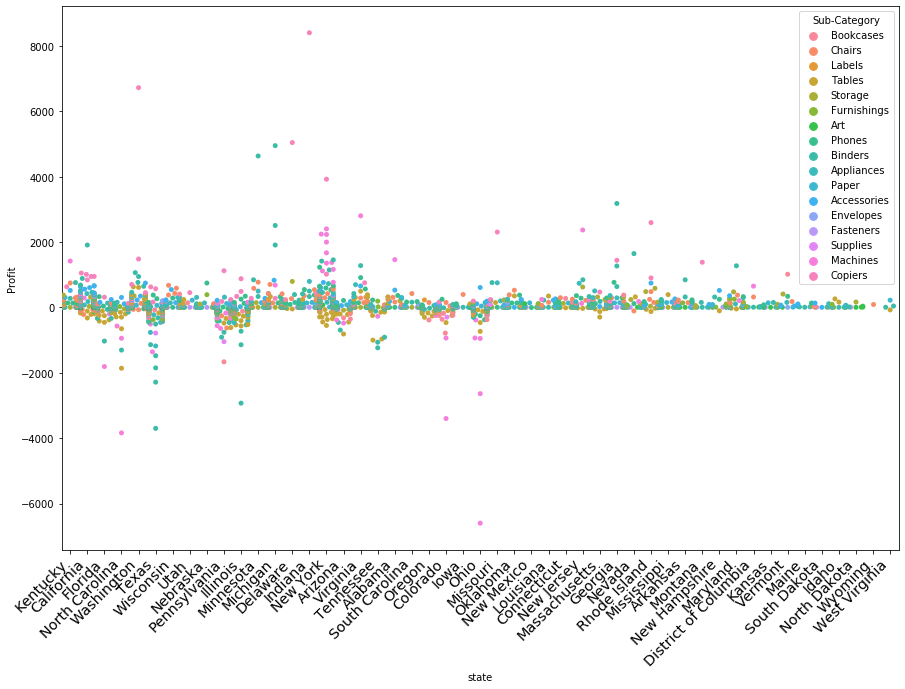

In [29]:
plt.figure(figsize=(15,10))
ax = sns.swarmplot(data=Data, x="state", y="Profit", hue="Sub-Category")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()
